## Stats OS number

- plots computed where data is not filtered beforehand

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
stats_path = "../../measurements/wt-postnatal-development/"
save_path = "../../plots-images/quapos-paper/figure-2-plots/"

In [3]:
measurements = pd.read_csv(stats_path + "05-c-measurements-filtered.csv")
measurements

,label,age,biol_repl,image_id,maximum,mean,median,minimum,sigma,sum,...,equivalent_spherical_perimeter_rescaled,equivalent_spherical_radius_rescaled,feret_diameter_rescaled,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled
0,1,8,1,0,803.0,314.092437,282.884766,186.0,99.098496,261639.0,...,138.287624,1.885333,8.107236,18.460443,8.872033,2.037236,85.604886,116.461211,51.389857,28.070656
1,2,8,1,0,1845.0,620.114058,466.576172,174.0,407.194822,467566.0,...,129.399980,1.823742,6.111447,8.976538,3.444867,2.044837,43.541779,42.257627,29.149001,25.408493
2,3,8,1,0,564.0,274.831858,253.494141,154.0,91.856545,62112.0,...,57.955182,1.220513,3.995289,6.273068,2.549953,1.312964,21.829812,14.018479,9.233325,7.615808
3,4,8,1,0,540.0,285.008439,268.189453,153.0,89.769054,67547.0,...,59.820799,1.240002,4.669557,6.273068,2.766553,1.117553,23.752687,16.175168,9.570308,7.986489
4,5,8,1,0,264.0,234.200000,238.798828,202.0,20.192821,5855.0,...,13.355085,0.585895,2.261000,2.777771,1.010003,0.745937,8.389508,2.426275,1.112043,0.842457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14896,173,24,28,83,312.0,243.290323,245.492188,179.0,26.596939,60336.0,...,61.657763,1.258897,5.297594,9.737588,4.460800,1.451807,40.056207,46.705798,12.805341,8.357170
14897,174,24,28,83,685.0,346.677288,326.101562,187.0,92.460071,424333.0,...,178.734172,2.143385,8.551879,30.066147,8.226779,5.176775,131.982553,226.856733,104.262438,41.246679
14898,175,24,28,83,609.0,337.340530,326.101562,188.0,81.507414,343750.0,...,158.174366,2.016343,8.478365,21.955740,9.303697,3.873424,102.052789,176.915902,74.136187,34.338534
14899,176,24,28,83,347.0,255.431818,252.820312,193.0,37.513655,11239.0,...,19.468019,0.707387,1.910894,4.002664,1.622372,0.810159,7.356350,3.032844,1.819706,1.482724


In [4]:
measurements_filtered = measurements[["label", "age", "biol_repl", "image_id"]]
measurements_filtered

,label,age,biol_repl,image_id
0,1,8,1,0
1,2,8,1,0
2,3,8,1,0
3,4,8,1,0
4,5,8,1,0
...,...,...,...,...
14896,173,24,28,83
14897,174,24,28,83
14898,175,24,28,83
14899,176,24,28,83


In [5]:
label = measurements_filtered.groupby("image_id", as_index=False)["label"].size()
label

,image_id,size
0,0,105
1,1,72
2,2,72
3,3,108
4,4,93
...,...,...
79,79,184
80,80,175
81,81,226
82,82,125


In [6]:
age = measurements.groupby("image_id", as_index=False)["age", "biol_repl"].max()
age

C:\Users\fsalo\AppData\Local\Temp\ipykernel_18476\4016667725.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age = measurements.groupby("image_id", as_index=False)["age", "biol_repl"].max()


,image_id,age,biol_repl
0,0,8,1
1,1,8,1
2,2,8,1
3,3,8,2
4,4,8,2
...,...,...,...
79,79,24,27
80,80,24,27
81,81,24,28
82,82,24,28


In [7]:
grouped_dataframe = pd.merge(left=label,
                 right=age,
                 how="inner")
grouped_dataframe.rename(columns={"size":"label"}, inplace=True)
grouped_dataframe

,image_id,label,age,biol_repl
0,0,105,8,1
1,1,72,8,1
2,2,72,8,1
3,3,108,8,2
4,4,93,8,2
...,...,...,...,...
79,79,184,24,27
80,80,175,24,27
81,81,226,24,28
82,82,125,24,28


In [8]:
label_mean = grouped_dataframe.groupby("biol_repl", as_index=False)["label", "age"].mean()
label_mean

C:\Users\fsalo\AppData\Local\Temp\ipykernel_18476\1154498187.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  label_mean = grouped_dataframe.groupby("biol_repl", as_index=False)["label", "age"].mean()


,biol_repl,label,age
0,1,83.000000,8.0
1,2,74.333333,8.0
2,3,83.000000,8.0
3,4,85.666667,8.0
4,5,146.333333,10.0
5,6,166.666667,10.0
6,7,214.333333,10.0
7,8,203.000000,12.0
8,9,199.333333,12.0
9,10,159.666667,12.0


In [128]:
timepoint = 8 + (10-8)/2
timepoint

9.0

Text(0.5, 0, 'Postnatal age in days')

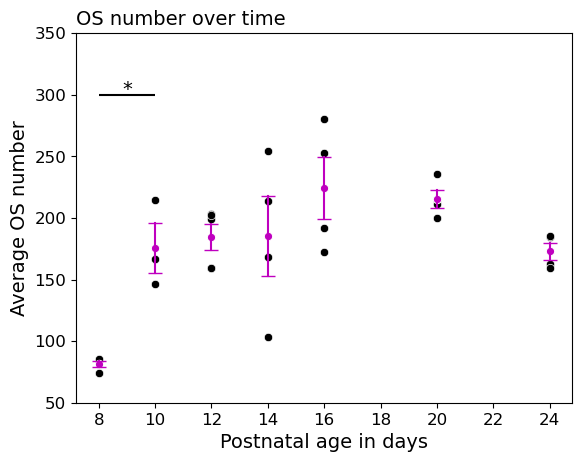

In [150]:
lineplot = sns.lineplot(data=label_mean,
             x="age",
             y="label",
             marker="o",
             linestyle="",
             markersize=6,
             errorbar="se",
             err_style = "bars",
             color="m",
             err_kws={"capsize": 5})

sns.scatterplot(data=label_mean,
                x="age",
                y="label",
                color="k")

lineplot.text(timepoint, 300, "*", fontsize=14, ha="center")
lineplot.hlines(y=300, xmax=8, xmin=10, color="k")

plt.ylim(50, 350)
plt.xticks(ticks = [8, 10, 12, 14, 16, 18, 20, 22, 24], labels = [8, 10, 12, 14, 16, 18, 20, 22, 24], fontsize=12)
plt.yticks(fontsize=12)
plt.title("OS number over time", loc="left", fontsize=14)
plt.ylabel("Average OS number", fontsize=14)
plt.xlabel("Postnatal age in days", fontsize=14)



#plt.savefig(save_path + "01-os-number-over-time.png",
 #           dpi=300,
  #          bbox_inches="tight",
   #         transparent=False)

In [ ]:
import stat

In [180]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [181]:
model = ols("label ~ age", data=label_mean).fit()
model

In [183]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
age,15046.123292,1.0,6.210201,0.019404
Residual,62992.999724,26.0,NaN,NaN


In [189]:
tukey_results = pairwise_tukeyhsd(label_mean["label"], label_mean["age"])
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   8.0   10.0  94.2778 0.0298    6.6094 181.9461   True
   8.0   12.0 103.2333 0.0044   26.2334 180.2333   True
   8.0   14.0 103.5833  0.007   22.4182 184.7484   True
   8.0   16.0 142.6667 0.0002   61.5016 223.8318   True
   8.0   20.0   133.75 0.0004   52.5849 214.9151   True
   8.0   24.0     91.5 0.0207   10.3349 172.6651   True
  10.0   12.0   8.9556 0.9998  -74.8714  92.7825  False
  10.0   14.0   9.3056 0.9998  -78.3628  96.9739  False
  10.0   16.0  48.3889 0.5657  -39.2794 136.0572  False
  10.0   20.0  39.4722  0.762  -48.1961 127.1406  False
  10.0   24.0  -2.7778    1.0  -90.4461  84.8906  False
  12.0   14.0     0.35    1.0    -76.65    77.35  False
  12.0   16.0  39.4333 0.6448  -37.5666 116.4333  False
  12.0   20.0  30.5167 0.8497  -46.4833 107.5166  False
  12.0   24.0 -11.7333 0.9987  -88.7333  65.2666

In [234]:
# Filter significant comparisons
significant_comparisons = tukey_results.reject

# Get the significant p-values
significant_p_values = tukey_results.pvalues[significant_comparisons == True]

print("Significant p-values:")
print(significant_p_values)

Significant p-values:
[0.02979725 0.00436551 0.00702635 0.0001988  0.00044575 0.02066309]


In [241]:
tukey_results = pd.DataFrame(tukey_results.summary())

In [245]:
significant_tukey_results = tukey_results[tukey_results[6] == "True"]

In [246]:
significant_tukey_results

,0,1,2,3,4,5,6


In [211]:
summary_tukey_result = tukey_results.summary()
summary_tukey_result

group1,group2,meandiff,p-adj,lower,upper,reject
8.0,10.0,94.2778,0.0298,6.6094,181.9461,True
8.0,12.0,103.2333,0.0044,26.2334,180.2333,True
8.0,14.0,103.5833,0.007,22.4182,184.7484,True
8.0,16.0,142.6667,0.0002,61.5016,223.8318,True
8.0,20.0,133.75,0.0004,52.5849,214.9151,True
8.0,24.0,91.5,0.0207,10.3349,172.6651,True
10.0,12.0,8.9556,0.9998,-74.8714,92.7825,False
10.0,14.0,9.3056,0.9998,-78.3628,96.9739,False
10.0,16.0,48.3889,0.5657,-39.2794,136.0572,False
10.0,20.0,39.4722,0.762,-48.1961,127.1406,False


In [182]:
sm.stats.anova_lm?

Signature: sm.stats.anova_lm(*args, **kwargs)
Docstring:
Anova table for one or more fitted linear models.

Parameters
----------
args : fitted linear model results instance
    One or more fitted linear models
scale : float
    Estimate of variance, If None, will be estimated from the largest
    model. Default is None.
test : str {"F", "Chisq", "Cp"} or None
    Test statistics to provide. Default is "F".
typ : str or int {"I","II","III"} or {1,2,3}
    The type of Anova test to perform. See notes.
robust : {None, "hc0", "hc1", "hc2", "hc3"}
    Use heteroscedasticity-corrected coefficient covariance matrix.
    If robust covariance is desired, it is recommended to use `hc3`.

Returns
-------
anova : DataFrame
    When args is a single model, return is DataFrame with columns:

    sum_sq : float64
        Sum of squares for model terms.
    df : float64
        Degrees of freedom for model terms.
    F : float64
        F statistic value for significance of adding model terms.
    PR

In [148]:
?lineplot.hlines

Signature:
lineplot.hlines(
    y,
    xmin,
    xmax,
    colors=None,
    linestyles='solid',
    label='',
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot horizontal lines at each *y* from *xmin* to *xmax*.

Parameters
----------
y : float or array-like
    y-indexes where to plot the lines.

xmin, xmax : float or array-like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have the same length.

colors : list of colors, default: :rc:`lines.color`

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional

label : str, default: ''

Returns
-------
`~matplotlib.collections.LineCollection`

Other Parameters
----------------
data : indexable object, optional
    If given, the following parameters also accept a string ``s``, which is
    interpreted as ``data[s]`` (unless this raises an exception):

    *y*, *xmin*, *xmax*, *colors*
**kwargs :  `~matplotlib.collections.LineCollection` properties.

See Also
--------
vlines : vertical l

In [18]:
#import custom functions
import sys
sys.path.append("../../../../../../01_python_definitions")
from fluorescent_microscopy_analysis import tukey_test

In [102]:
f, p, tukey_results = tukey_test(label_mean, feature="label")

In [164]:
tukey_results

group1,group2,meandiff,p-adj,lower,upper,reject
8.0,10.0,94.2778,0.0298,6.6094,181.9461,True
8.0,12.0,103.2333,0.0044,26.2334,180.2333,True
8.0,14.0,103.5833,0.007,22.4182,184.7484,True
8.0,16.0,142.6667,0.0002,61.5016,223.8318,True
8.0,20.0,133.75,0.0004,52.5849,214.9151,True
8.0,24.0,91.5,0.0207,10.3349,172.6651,True
10.0,12.0,8.9556,0.9998,-74.8714,92.7825,False
10.0,14.0,9.3056,0.9998,-78.3628,96.9739,False
10.0,16.0,48.3889,0.5657,-39.2794,136.0572,False
10.0,20.0,39.4722,0.762,-48.1961,127.1406,False


In [178]:
tukey_results_pd = np.asarray(tukey_results)
#tukey_results_pd.columns = tukey_results_pd.iloc[0]
#tukey_results_pd = tukey_results_pd.drop(0)
tukey_results_pd

array([[<statsmodels.iolib.table.Cell object at 0x000001C148B772B0>,
      dtype=object)

In [172]:
tukey_results_pd[tukey_results_pd[6] == "True"]

,0,1,2,3,4,5,6
